# Project 1

## Data Creation

### Library Imports

In [1]:
import random
import csv
import pandas as pd
import timeit
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.setrecursionlimit(5000)

### Function to Create List of Random Numbers

In [2]:
# Function that returns a list of n random numbers
def createRandomNumbers(n):
    numberList = []
    for i in range(n):
        n = random.randint(0,1000)
        numberList.append(n)
    return numberList

def reverseLists(lists):
    templist = []
    for numberList in lists:
        templist.append(numberList[::-1])
    return templist

### Create Lists of Numbers

In [3]:
requiredLists = [1000, 2000, 3000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]
#requiredLists = [1000, 2000, 3000, 4000]

def createLists(requiredLists):
    
    createdLists = []
    
    for n in requiredLists:        
        createdLists.append(createRandomNumbers(n))
    return createdLists

numberLists = createLists(requiredLists)
print('done')

done


### Function to export data

In [4]:
def exportToCSV(data, dataOrder):
    
    #fields = ['1000', '2000', '3000', '5000', '10000', '20000', '30000', '40000', '50000', '60000'] 
    
    with open(f'{dataOrder}_data', 'w') as f:

        # using csv.writer method from CSV package
        write = csv.writer(f)

        #write.writerow(fields)
        write.writerows(data)
        
exportToCSV(numberLists, "randomOrder")

## Algorithms

### Insertion Sort

In [5]:
def insertionSort(A, l, r):
  
    for i in range(l, r):

        # Store comparator
        c = A[i]

        # While current value being checked is larger than comparator c move it
        # one position to the right and c
        j = i-1
        while j>= 0 and c < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = c


### Merge Sort

In [6]:
# Merge function
def merge(A, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    # Create L and R arrays
    L = [0] * n1
    R = [0] * n2
 
    # Copy data to arrays L and R
    for i in range(0, n1):
        L[i] = A[l + i]
 
    for j in range(0, n2):
        R[j] = A[m + 1 + j]
    
    #Indices
    i = 0
    j = 0
    k = l
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        A[k] = L[i]
        i += 1
        k += 1
 
    while j < n2:
        A[k] = R[j]
        j += 1
        k += 1

In [7]:
def mergeSort(numbersList, p, r):
    if p < r: 
        q = (p+r)//2
        mergeSort(numbersList, p, q)
        mergeSort(numbersList, q+1, r)
        merge(numbersList, p, q, r)

### Heap Sort

In [8]:
def heapify(A, n, i):
    largest = i 
    l = 2 * i + 1  
    r = 2 * i + 2 
 
    if l < n and A[i] < A[l]:
        largest = l
 
    if r < n and A[largest] < A[r]:
        largest = r
 
 # Change root as requred
    if largest != i:
        (A[i], A[largest]) = (A[largest], A[i])
        heapify(A, n, largest)

In [9]:
def heapSort(A):
    n = len(A)
 
    for i in range(n // 2 - 1, -1, -1):
        heapify(A, n, i)
 
    for i in range(n - 1, 0, -1):
        (A[i], A[0]) = (A[0], A[i])
        heapify(A, i, 0)

### In-Place Quick Sort

In [10]:
#Partion function
def inPlacePartition(A, s, e, p):

    if not (s <= p <= e):
        raise ValueError('idx pivot must be between start and end')

    A[s], A[p] = A[p], A[s]
    pivot = A[s]
    i = s + 1
    j = s + 1

    while j <= e:
        if A[j] <= pivot:
            A[j], A[i] = A[i], A[j]
            i += 1
        j += 1

    A[s], A[i - 1] = A[i - 1], A[s]
    return i - 1

In [11]:
# In place quick sort function
def inPlaceQuickSort(A, l=0, r=None):

    if r is None:
        r = len(A) - 1

    if r - l < 1:
        return

    idx_pivot = random.randint(l, r)
    i = inPlacePartition(A, l, r, idx_pivot)

    inPlaceQuickSort(A, l, i - 1)
    inPlaceQuickSort(A, i + 1, r)  

### Modified Quicksort

In [12]:
#Median of three function

def median_of_three(a, b,c):
    if ((b <= a and a <= c) or (c <= a and a <= b)):
        return a
    if ((a <= b and b <= c) or (c <= b and b <= a)):
        return b
    return c

def getPivot(A, left, right):
    mid = (left + right) // 2;
    return median_of_three(A[left], A[mid], A[right]);

In [13]:
def partition(arr,low,high,pivot):
    i = low-1
    j = high+1
    while 1:
        while 1:
            i+=1
            if(arr[i]>=pivot):
                break
        while 1:
            j-=1
            if(arr[j]<=pivot):
                break
        if i>=j:
            return j
        arr[i],arr[j] = arr[j],arr[i]

In [14]:
def swapPositions(list, pos1, pos2):
     
    list[pos1], list[pos2] = list[pos2], list[pos1]

In [15]:
def modifiedQuickSort(A, left, right): 
    if (left + 10 <= right):
        pivot = getPivot(A, left, right)
        i = left
        j = right

        while (True):
            while (A[i] < pivot):
                i += 1
            while (pivot < A[j]):
                j -= 1
            if (i < j):
                swapPositions(A,i, j)
                i += 1
                j -= 1
            else:
                break
        
        modifiedQuickSort(A,left, i - 1)
        modifiedQuickSort(A,j + 1, right)
    else:
        insertionSort(A, left, right)


# Randomized Numbers

## Function to Run Algorithms

In [16]:
#Function that runs all algorithms
def runAlgorithms(lists):
    
    dfRows = [['1000', 0, 0, 0, 0, 0], ['2000', 0, 0, 0, 0, 0], ['3000', 0, 0, 0, 0, 0], ['5000', 0, 0, 0, 0, 0],
           ['10000', 0, 0, 0, 0, 0], ['20000', 0, 0, 0, 0, 0], ['30000', 0, 0, 0, 0, 0],['40000', 0, 0, 0, 0, 0], ['50000', 0, 0, 0, 0, 0], ['60000', 0, 0, 0, 0, 0]]
    
    t0 = 0.0
    t1 = 0.0
    
    insertionSortTimes = []
    mergeSortTimes = []
    heapSortTimes = []
    inPlaceQuickSortTimes = []
    modifiedQuickSortTimes = []
    
    for i in range(len(lists)):
        for j in range(10):
            #Start time
            t0 = timeit.default_timer()
            
            #INSERTION SORT
            ISlist = lists[i].copy()
            insertionSort(ISlist,0, len(ISlist))
            
            #End time
            t1 = timeit.default_timer()
            
            #Calculate elapsed time
            elapsedTime = round((t1 - t0) * 10 ** 6, 3)
            
            #add elapsed time to list
            insertionSortTimes.append(elapsedTime)
            
            #Start time
            t0 = timeit.default_timer()
            
            #MERGE SORT
            mergeSort(lists[i].copy(), 0, len(lists[i])-1)
            
            #End time
            t1 = timeit.default_timer()
            
            #Calculate elapsed time
            elapsedTime = round((t1 - t0) * 10 ** 6, 3)
            
            #add elapsed time to list
            mergeSortTimes.append(elapsedTime)
            
            #Start time
            t0 = timeit.default_timer()
            
            #HEAP SORT
            heapSort(lists[i].copy())
            
            #End time
            t1 = timeit.default_timer()
            
            #Calculate elapsed time
            elapsedTime = round((t1 - t0) * 10 ** 6, 3)
            
            #add elapsed time to list
            heapSortTimes.append(elapsedTime)
            
            #Start time
            t0 = timeit.default_timer()
            
            #IN PLACE QUICK SORT
            inPlaceQuickSort(lists[i].copy())
            
            #End time
            t1 = timeit.default_timer()
            
            #Calculate elapsed time
            elapsedTime = round((t1 - t0) * 10 ** 6, 3)
            
            #add elapsed time to list
            inPlaceQuickSortTimes.append(elapsedTime)
            
            #Start time
            t0 = timeit.default_timer()
            
            #MODIFIED QUICK SORT
            MQSlist = lists[i]
            modifiedQuickSort(MQSlist,0, (len(lists[i])-1))
            
            #End time
            t1 = timeit.default_timer()
            
            #Calculate elapsed time
            elapsedTime = round((t1 - t0) * 10 ** 6, 3)
            
            #add elapsed time to list
            modifiedQuickSortTimes.append(elapsedTime)
        
        #Calculate insertion sort average time
        insertionSortAvgTime = sum(insertionSortTimes)/len(insertionSortTimes)
        dfRows[i][1] = insertionSortAvgTime
        
        #Calculate merge sort average time
        mergeSortAvgTime = sum(mergeSortTimes)/len(mergeSortTimes)
        dfRows[i][2] = mergeSortAvgTime
        
        #Calculate heap sort average time
        heapSortAvgTime = sum(heapSortTimes)/len(heapSortTimes)
        dfRows[i][3] = heapSortAvgTime
        
        #Calculate In Place Quick sort average time
        inPlaceQuickSortAvgTime = sum(inPlaceQuickSortTimes)/len(inPlaceQuickSortTimes)
        dfRows[i][4] = inPlaceQuickSortAvgTime
        
        #Calculate Modified Quick sort average time
        modifiedQuickSortAvgTime = sum(modifiedQuickSortTimes)/len(modifiedQuickSortTimes)
        dfRows[i][5] = modifiedQuickSortAvgTime
        
    return dfRows
print('done')

done


### Run Algorithms and  Create DataFrame

In [17]:
#Get dataFrame data from runAlgorithms function
dfData = runAlgorithms(numberLists)

#Export sorted data
exportToCSV(numberLists, "sorted")

#DataFrame column names
columnNames = ['n', 'Insertion Sort', 'Merge Sort', 'Heap Sort', 'In-Place Quick Sort', 'Modified Quicksort']

# Create DataFrame with results data and columns
randomNumbersResultsDF = pd.DataFrame(dfData, columns = columnNames)



display(randomNumbersResultsDF)

,n,Insertion Sort,Merge Sort,Heap Sort,In-Place Quick Sort,Modified Quicksort
0,1000,3.508496e+03,3252.325200,3895.896100,2394.591900,774.862500
1,2000,9.073452e+03,5174.041750,6299.854250,3911.808450,1247.216550
2,3000,1.647378e+04,7110.063933,8840.616700,5537.819567,1764.404067
3,5000,3.458019e+04,10184.859450,12829.520900,8338.596975,2566.021825
4,10000,9.893571e+04,16376.844240,21155.367540,14582.893440,4218.954120
5,20000,3.174366e+05,28230.452167,36723.923667,28758.818167,7624.486083
6,30000,7.296106e+05,43442.338157,56606.233371,50045.627471,11977.292257
7,40000,1.350378e+06,61071.770875,79473.433350,78383.325613,17106.893750
8,50000,2.187910e+06,80337.307433,104439.411578,113154.569056,22837.549533
9,60000,3.245794e+06,100792.133350,131168.922090,154567.172570,28918.087500


## Plot Data

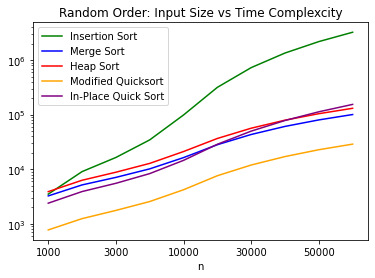

In [27]:
ax = plt.gca()
 
# line plot for INSERTION SORT 
randomNumbersResultsDF.plot(kind='line',
        x='n',
        y='Insertion Sort',
        color='green', ax=ax)

# line plot for MERGE SORT 
randomNumbersResultsDF.plot(kind='line', x='n',
        y='Merge Sort',
        color='blue', ax=ax)

# line plot for HEAP SORT 
randomNumbersResultsDF.plot(kind='line', x='n',
        y='Heap Sort',
        color='red', ax=ax)

# line plot for MODIFIED QUICKSORT 
randomNumbersResultsDF.plot(kind='line', x='n',
        y='Modified Quicksort',
        color='orange', ax=ax)

# line plot for IN-PLACE QUICKSORT 
randomNumbersResultsDF.plot(kind='line', x='n',
        y='In-Place Quick Sort',
        color='purple', ax=ax)


plt.yscale('log')
# set title
plt.title('Random Order: Input Size vs Time Complexcity')
 
# show plot
plt.show()

# Sorted Numbers Analysis

In [19]:
#Get dataFrame data from runAlgorithms function
dfData = runAlgorithms(numberLists.copy())

#Export sorted data
exportToCSV(numberLists, "sorted")

#DataFrame column names
columnNames = ['n', 'Insertion Sort', 'Merge Sort', 'Heap Sort', 'In-Place Quick Sort', 'Modified Quicksort']

# Create DataFrame with results data and columns
sortedNumbersResultsDF = pd.DataFrame(dfData, columns = columnNames)



display(sortedNumbersResultsDF)

,n,Insertion Sort,Merge Sort,Heap Sort,In-Place Quick Sort,Modified Quicksort
0,1000,167.200100,3220.641500,3910.679300,2554.350100,721.966800
1,2000,255.933400,5094.637350,6337.943800,3976.860400,1158.225000
2,3000,341.945867,7042.573500,8905.534800,5588.998567,1648.416733
3,5000,476.366675,10116.130100,12948.107275,8424.742700,2400.706325
4,10000,730.754180,16237.209060,21284.044960,14685.018340,3949.497560
5,20000,1178.985417,27987.897817,36876.940933,28873.856933,7219.391000
6,30000,1734.778571,43027.988000,56673.006500,50353.946400,11433.365486
7,40000,2358.664575,60400.218137,79346.509350,78462.926537,16393.223425
8,50000,3029.710189,79329.642967,104059.576378,113310.428667,21956.488433
9,60000,3746.095830,99432.182830,130476.558740,155145.882450,27853.115000


## Plot

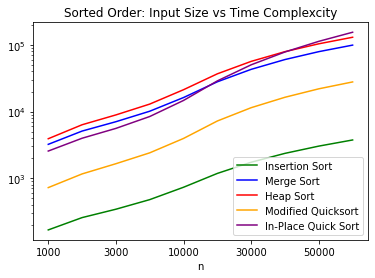

In [24]:
ax = plt.gca()
 
# line plot for INSERTION SORT 
sortedNumbersResultsDF.plot(kind='line',
        x='n',
        y='Insertion Sort',
        color='green', ax=ax)

# line plot for MERGE SORT 
sortedNumbersResultsDF.plot(kind='line', x='n',
        y='Merge Sort',
        color='blue', ax=ax)

# line plot for HEAP SORT 
sortedNumbersResultsDF.plot(kind='line', x='n',
        y='Heap Sort',
        color='red', ax=ax)

# line plot for MODIFIED QUICKSORT 
sortedNumbersResultsDF.plot(kind='line', x='n',
        y='Modified Quicksort',
        color='orange', ax=ax)

# line plot for IN-PLACE QUICKSORT 
sortedNumbersResultsDF.plot(kind='line', x='n',
        y='In-Place Quick Sort',
        color='purple', ax=ax)

plt.yscale('log')
# set title
plt.title('Sorted Order: Input Size vs Time Complexcity')
 
# show plot
plt.show()

# Reverse Sorted Analysis

In [21]:
#Get dataFrame data from runAlgorithms function
reverseData = reverseLists(numberLists.copy())
dfData = runAlgorithms(reverseData)

#Export sorted data
exportToCSV(reverseData, "reverseSorted")

#DataFrame column names
columnNames = ['n', 'Insertion Sort', 'Merge Sort', 'Heap Sort', 'In-Place Quick Sort', 'Modified Quicksort']

# Create DataFrame with results data and columns
reverseSortedNumbersResultsDF = pd.DataFrame(dfData, columns = columnNames)


display(reverseSortedNumbersResultsDF)

,n,Insertion Sort,Merge Sort,Heap Sort,In-Place Quick Sort,Modified Quicksort
0,1000,6.737250e+03,3222.895600,3896.895700,2385.879000,720.787700
1,2000,1.723023e+04,5088.181150,6288.031250,3934.004000,1152.602200
2,3000,3.241738e+04,7043.493033,8813.280567,5581.655433,1644.458400
3,5000,6.816522e+04,10187.665600,12851.759375,8391.938400,2415.986525
4,10000,1.956538e+05,16362.979120,21130.049960,14677.743220,3982.975880
5,20000,6.345252e+05,28019.656183,36610.992350,28823.879783,7267.083367
6,30000,1.454843e+06,43039.173771,56364.255971,49905.859471,11498.003586
7,40000,2.694686e+06,60489.760400,79258.406237,77940.419200,16458.243225
8,50000,4.401671e+06,79510.233333,103964.031489,113028.755489,22035.339333
9,60000,6.519022e+06,99856.912090,130278.695830,154260.944110,27955.317090


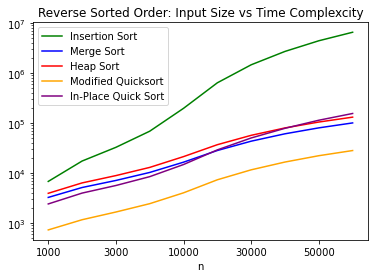

In [23]:
ax = plt.gca()
 
# line plot for INSERTION SORT 
reverseSortedNumbersResultsDF.plot(kind='line',
        x='n',
        y='Insertion Sort',
        color='green', ax=ax)

# line plot for MERGE SORT 
reverseSortedNumbersResultsDF.plot(kind='line', x='n',
        y='Merge Sort',
        color='blue', ax=ax)

# line plot for HEAP SORT 
reverseSortedNumbersResultsDF.plot(kind='line', x='n',
        y='Heap Sort',
        color='red', ax=ax)

# line plot for MODIFIED QUICKSORT 
reverseSortedNumbersResultsDF.plot(kind='line', x='n',
        y='Modified Quicksort',
        color='orange', ax=ax)

# line plot for IN-PLACE QUICKSORT 
reverseSortedNumbersResultsDF.plot(kind='line', x='n',
        y='In-Place Quick Sort',
        color='purple', ax=ax)

plt.yscale('log')
# set title
plt.title('Reverse Sorted Order: Input Size vs Time Complexcity')
 
# show plot
plt.show()